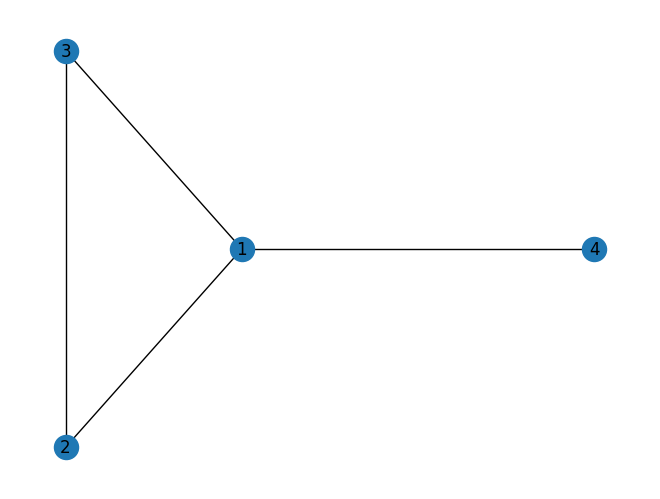

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([(1 ,2) , (2 ,3) , (1 ,3) , (1 ,4) ])
#nx.draw(G)
#nx.draw_circular(G)
nx.draw_spectral(G, with_labels=True)
plt.show()

In [9]:
# https://www.askpython.com/python/examples/adjacency-matrix-python
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# First function creates Adjacency Matrix from given Graph vertices and Edges
def createAdjacencyMatrix(vertices,edges):
  noofvertices=len(vertices)
  adjM=[]
  while(len(adjM)<noofvertices):
    temp=[]
    for i in range(noofvertices):
      temp.append(0)
    adjM.append(temp)
  for edge in edges:
    i=edge[0]
    j=edge[1]
    if i>=noofvertices or j>=noofvertices or i<0 or j<0:
      print(f"Not a Proper Input in Edge {i},{j}")
    else:
      adjM[i][j]=1
      adjM[j][i]=1
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  return adjM

In [11]:
# Creating a Graph from Vertices and Edges to Check the function
vertices=[0,1,2,3,4,5]
edges=[[1,2],[2,4],[1,5],[3,5],[4,5],[1,3],[0,3],[0,2],[5,3],[5,1]]

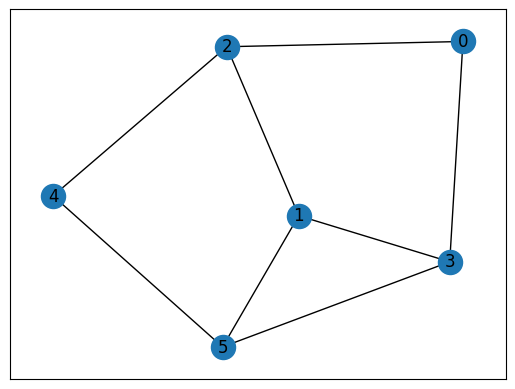

[[0, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1],
 [0, 1, 0, 1, 1, 0]]

In [12]:
createAdjacencyMatrix(vertices,edges)

In [136]:
# the Second Function creates Graph from Adjacency Matrix
def createGraph(adjM):
  edges=[]
  noofvertices=len(adjM)
  for mat in adjM:
    if len(mat)>noofvertices or len(mat)<noofvertices:
      print("False Adjacency Matrix")
      return 0
  for i in range(len(adjM)):
    mat=adjM[i]
    for j in range(len(mat)):
      if mat[j]==1:
        temp=[i,j]
        edges.append(temp)
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_spring(G)
  plt.show()
  vertices=[i for i in range(len(adjM))]
  return vertices,edges

In [137]:
# Creating an Adjacency Matrix to check the function
adjM=[[1,0,1,0,1],[0,0,1,1,0],[1,1,0,1,0],[1,1,0,0,0],[0,0,0,1,0]]

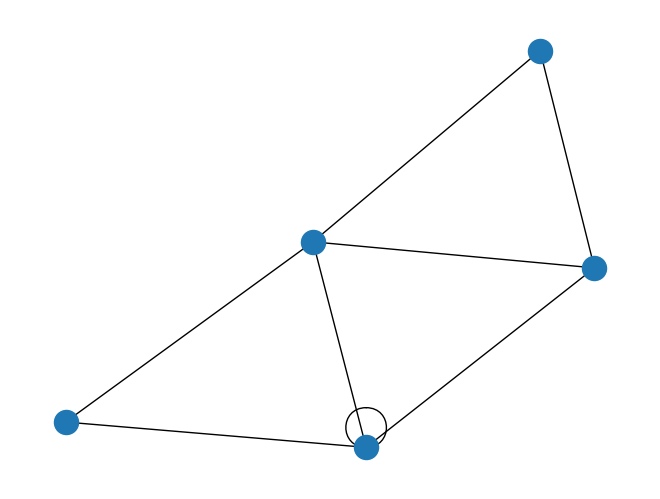

([0, 1, 2, 3, 4],
 [[0, 0],
  [0, 2],
  [0, 4],
  [1, 2],
  [1, 3],
  [2, 0],
  [2, 1],
  [2, 3],
  [3, 0],
  [3, 1],
  [4, 3]])

In [140]:
createGraph(adjM)

## Undirected graphs

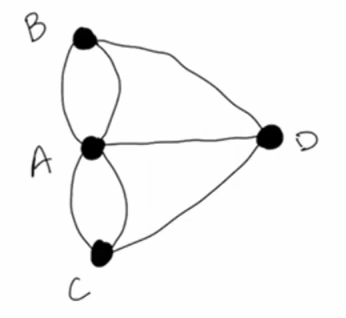

In [22]:
# https://www.youtube.com/watch?v=ukFNELi_U88

from collections import namedtuple

import networkx as nx
import matplotlib.pyplot as plt

In [48]:
# Math representation
Graph = namedtuple("Graph", ["nodes", "edges"])

nodes = ["A", "B", "C", "D"]
edges = [
    ("A","B"),
    ("A","B"),
    ("A","C"),
    ("A","C"),
    ("A","D"),
    ("B","D"),
    ("C","D")
]

G = Graph(nodes, edges)
G

Graph(nodes=['A', 'B', 'C', 'D'], edges=[('A', 'B'), ('A', 'B'), ('A', 'C'), ('A', 'C'), ('A', 'D'), ('B', 'D'), ('C', 'D')])

In [49]:
# Adjacency list representation

def adjacency_dict(graph):
  adj = {node: [] for node in graph.nodes}
  for edge in graph.edges:
    node1, node2 = edge[0], edge[1]
    adj[node1].append(node2)
    adj[node2].append(node1)
  return adj

adj_list = adjacency_dict(G)
adj_list

{'A': ['B', 'B', 'C', 'C', 'D'],
 'B': ['A', 'A', 'D'],
 'C': ['A', 'A', 'D'],
 'D': ['A', 'B', 'C']}

In [50]:
# Adjacency matrix representation

def adjacency_matrix(graph):
  adj = [[0 for node in graph.nodes] for node in graph.nodes]
  for edge in graph.edges:
    node1, node2 = edge[0], edge[1]
    adj[node1][node2] += 1
    adj[node2][node1] += 1
  return adj

nodes = range(4)
edges = [(0,1),(0,1),(0,2),(0,2),(0,3),(1,3),(2,3)]
G = Graph(nodes, edges)
adj_matrix = adjacency_matrix(G)
adj_matrix

[[0, 2, 2, 1], [2, 0, 0, 1], [2, 0, 0, 1], [1, 1, 1, 0]]

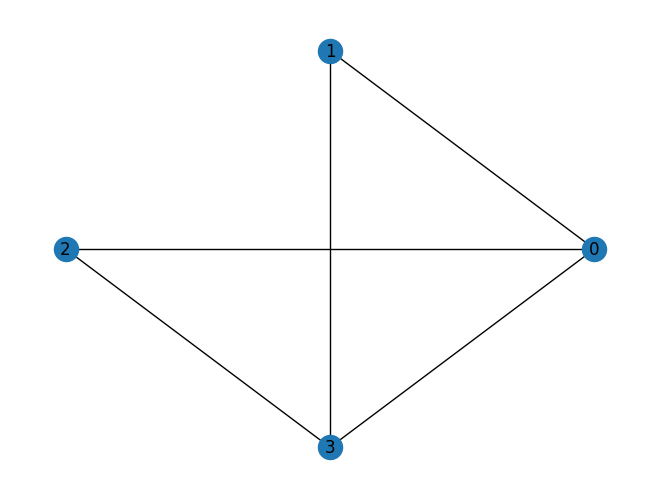

In [51]:
Gnx = nx.Graph()
#Gnx.add_edges_from([("A","B"),("A","B"),("A","C"),("A","C"),("A","D"),("B","D"),("C","D")])
Gnx.add_edges_from(edges)
nx.draw_circular(Gnx, with_labels=True)
plt.show()

## Directed graphs

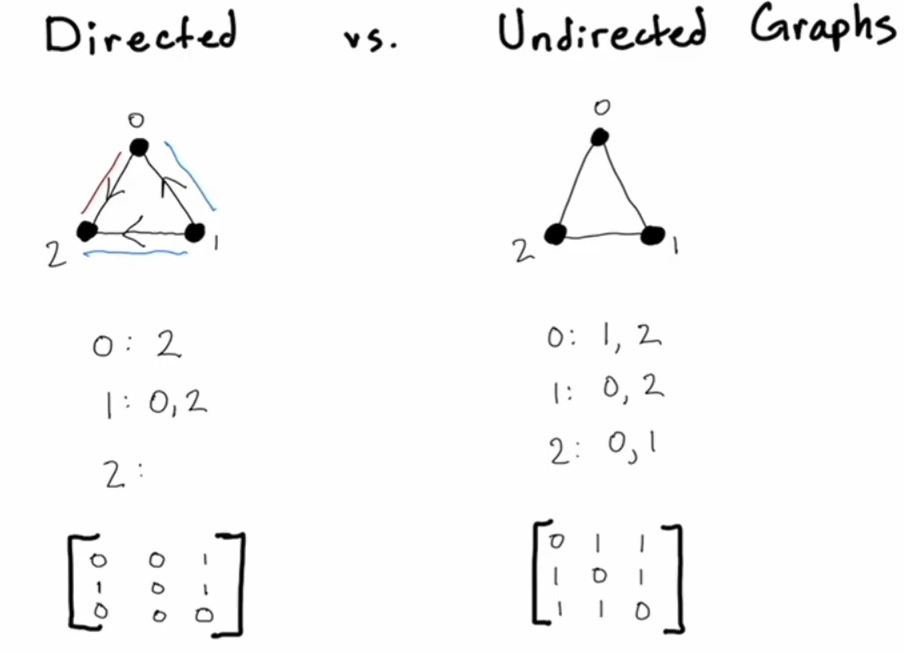

In [53]:
# https://www.youtube.com/watch?v=ukFNELi_U88

from collections import namedtuple

import networkx as nx
import matplotlib.pyplot as plt

In [83]:
Graph = namedtuple("Graph", ["nodes", "edges", "is_directed"])

# Adjacency list representation
def adjacency_dict(graph):
  adj = {node: [] for node in graph.nodes}
  for edge in graph.edges:
    node1, node2 = edge[0], edge[1]
    adj[node1].append(node2)
    if not graph.is_directed:
      adj[node2].append(node1)
  return adj


# Adjacency matrix representation
def adjacency_matrix(graph):
  adj = [[0 for node in graph.nodes] for node in graph.nodes]
  for edge in graph.edges:
    node1, node2 = edge[0], edge[1]
    adj[node1][node2] += 1
    if not graph.is_directed:
      adj[node2][node1] += 1
  return adj

In [91]:
# on the picture above
# nodes = range(3)
# edges = [(1,0),(1,2),(0,2)]

nodes = range(4)
edges = [(0,1),(1,0),(0,2),(2,0),(0,3),(1,3),(2,3)]
G = Graph(nodes, edges, is_directed=False)

In [92]:
adj_list = adjacency_dict(G)
adj_matrix = adjacency_matrix(G)
print("list:",adj_list)
print("matrix:",adj_matrix)

list: {0: [1, 1, 2, 2, 3], 1: [0, 0, 3], 2: [0, 0, 3], 3: [0, 1, 2]}
matrix: [[0, 2, 2, 1], [2, 0, 0, 1], [2, 0, 0, 1], [1, 1, 1, 0]]


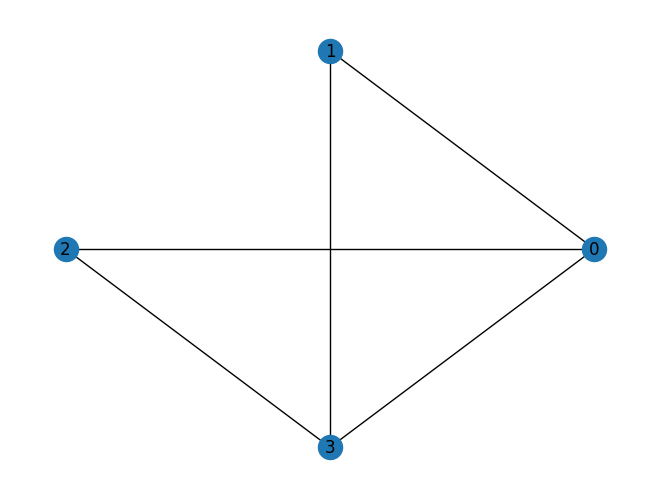

In [93]:
Gnx = nx.Graph()
Gnx.add_edges_from(edges)
nx.draw_circular(Gnx, with_labels=True)
plt.show()

In [94]:
nodes = range(4)
edges = [(0,1),(1,0),(0,2),(2,0),(0,3),(1,3),(2,3)]
G = Graph(nodes, edges, is_directed=True)

In [95]:
adj_list = adjacency_dict(G)
adj_matrix = adjacency_matrix(G)
print("list:",adj_list)
print("matrix:",adj_matrix)

list: {0: [1, 2, 3], 1: [0, 3], 2: [0, 3], 3: []}
matrix: [[0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0]]


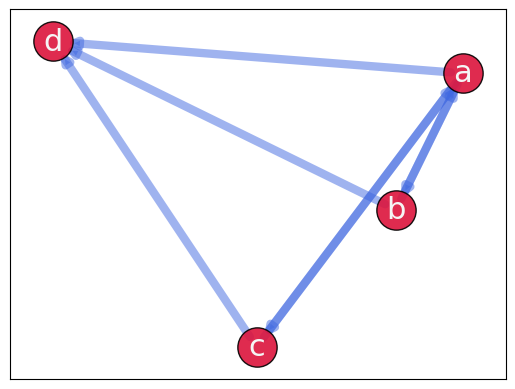

In [126]:
Gnx = nx.DiGraph(edges)

pos = nx.spring_layout(Gnx, seed=3113794652)
nx.draw_networkx_nodes(Gnx, pos, node_color="crimson", node_size=800, alpha=0.9, edgecolors="k")
nx.draw_networkx_edges(Gnx, pos, width=6.0, alpha=0.5, edge_color='royalblue')
nx.draw_networkx_labels(G, pos, {0: "a", 1: "b", 2: "c", 3: "d",}, font_size=22, font_color="whitesmoke")

#nx.draw_spectral(Gnx, with_labels=True, node_color='crimson', alpha=0.3)
plt.show()

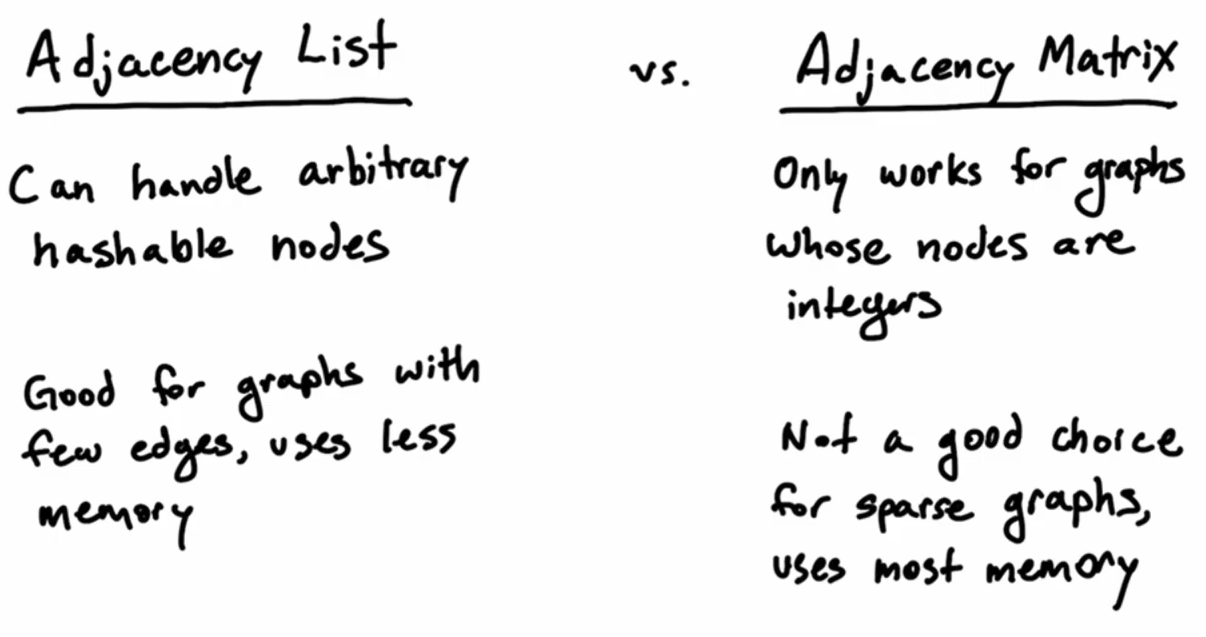